In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
!pip install klib
import klib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Using klib for automating the cleaning and preprocessing 

In [3]:
df = klib.data_cleaning(df)

Shape of cleaned data: (10463, 11) - Remaining NAs: 2


Dropped rows: 220
     of which 220 duplicates. (Rows (first 150 shown): [683, 1061, 1348, 1418, 1674, 1685, 1704, 1807, 1891, 1971, 1982, 2093, 2548, 2595, 2661, 2677, 2716, 2845, 2870, 2903, 2943, 3003, 3102, 3135, 3151, 3256, 3283, 3363, 3450, 3457, 3620, 3632, 3674, 3711, 3717, 3843, 3856, 3984, 4026, 4096, 4132, 4260, 4300, 4323, 4412, 4571, 4593, 4636, 4649, 4710, 4865, 4920, 4945, 5014, 5042, 5092, 5336, 5359, 5363, 5365, 5391, 5442, 5470, 5483, 5509, 5844, 5855, 5913, 5928, 5967, 6052, 6126, 6170, 6206, 6377, 6449, 6469, 6510, 6512, 6658, 6670, 6742, 6758, 6770, 6881, 6884, 6898, 6972, 6986, 7088, 7104, 7133, 7185, 7229, 7259, 7283, 7345, 7453, 7502, 7589, 7611, 7647, 7666, 7676, 7743, 7754, 7794, 7907, 7912, 7925, 8065, 8069, 8105, 8112, 8168, 8174, 8180, 8181, 8216, 8310, 8319, 8344, 8360, 8383, 8446, 8496, 8529, 8546, 8558, 8559, 8566, 8602, 8627, 8631, 8635, 8640, 8697, 8781, 8821, 8861, 8882, 8927, 8962, 8967, 9024, 9

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   airline          10463 non-null  category
 1   date_of_journey  10463 non-null  category
 2   source           10463 non-null  category
 3   destination      10463 non-null  category
 4   route            10462 non-null  category
 5   dep_time         10463 non-null  category
 6   arrival_time     10463 non-null  string  
 7   duration         10463 non-null  string  
 8   total_stops      10462 non-null  category
 9   additional_info  10463 non-null  category
 10  price            10463 non-null  int32   
dtypes: category(8), int32(1), string(2)
memory usage: 324.3 KB


<AxesSubplot:>

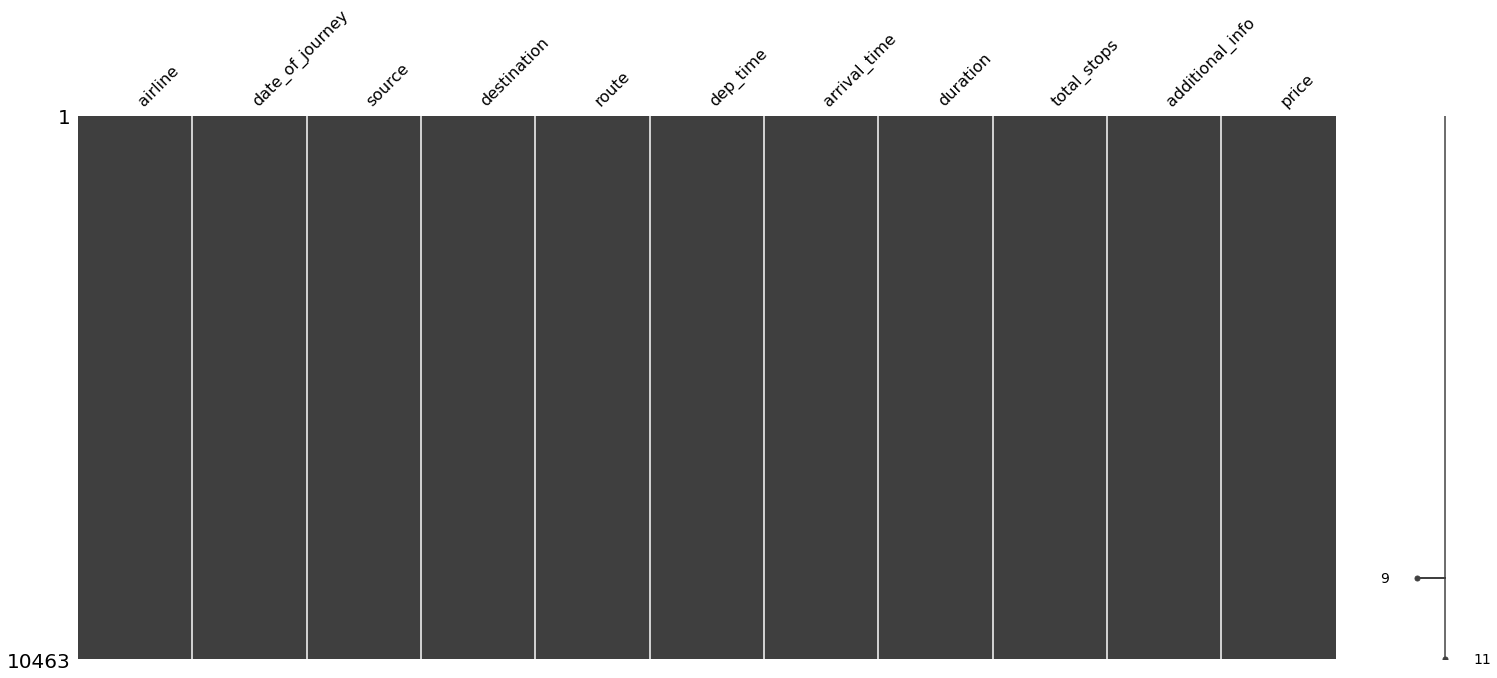

In [5]:
import missingno as msno 
msno.matrix(df)

### Feature engineering

In [6]:
# Getting the date, month,year from date of journey column separately

df['date'] = df['date_of_journey'].str.split('/').str[0].astype(int)
df['month'] = df['date_of_journey'].str.split('/').str[1].astype(int)
df['year'] = df['date_of_journey'].str.split('/').str[2].astype(int)
df.drop('date_of_journey', axis = 1, inplace = True)

In [7]:
# Removing date from arrival time column
df['arrival_time'] = df['arrival_time'].apply(lambda x: x.split(' ')[0])

In [8]:
# Splitting arrival time into arrival hour and arrival min
df['arrival_hour'] = df['arrival_time'].str.split(':').str[0].astype(int)
df['arrival_min'] = df['arrival_time'].str.split(':').str[1].astype(int)
df.drop('arrival_time', axis = 1, inplace = True)

In [9]:
df['dep_hr']= df['dep_time'].str.split(':').str[0].astype(int)
df['dep_min']= df['dep_time'].str.split(':').str[1].astype(int)
df.drop('dep_time', axis = 1, inplace = True)

In [10]:
df['total_stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: total_stops, dtype: int64

In [11]:
df['total_stops'].isnull().sum()

1

### Encoding

In [12]:
# Encoding the total stops col:
# Ordinal encoding as the flight prices keep on increasing with stops 

df['total_stops'] = df['total_stops'].map({'nonn-stop' : 0, '1 stop' : 1,'2 stops' : 2,'3 stops' : 3, '4 stops': 4, np.nan :1})

In [13]:
df.drop('route', axis = 1, inplace = True)

In [14]:
# Dropping the 6397th row as it contained a 5 min flight in duration col
df.drop(6397, axis = 0, inplace = True)

In [15]:
# Separating the duration of flight in hrs and mins
df['duration_hrs'] = df['duration'].str.split(' ').str[0].str.split('h').str[0].astype(int)

In [16]:
df['duration_hrs']

0         2
1         7
2        19
3         5
4         4
         ..
10458     2
10459     2
10460     3
10461     2
10462     8
Name: duration_hrs, Length: 10462, dtype: int32

In [17]:
df['duration_mins'] = df['duration'].str.split(' ').str[1].str.split('m').str[0].astype(float)
df['duration_mins']=df['duration_mins'].fillna(0)
df['duration_mins']

0        50.0
1        25.0
2         0.0
3        25.0
4        45.0
         ... 
10458    30.0
10459    35.0
10460     0.0
10461    40.0
10462    20.0
Name: duration_mins, Length: 10462, dtype: float64

In [18]:
# Recreating the duration column containin the total duration of flight in mins
df['duration'] = ( df['duration_hrs'] * 60 )+ df['duration_mins']

In [19]:
df['duration']

0         170.0
1         445.0
2        1140.0
3         325.0
4         285.0
          ...  
10458     150.0
10459     155.0
10460     180.0
10461     160.0
10462     500.0
Name: duration, Length: 10462, dtype: float64

In [20]:
df.drop(['duration_hrs', 'duration_mins', 'additional_info'], axis = 1, inplace = True)

In [21]:
# Filling missing values in total stops column
df['total_stops'].fillna(0, inplace = True)

In [22]:
df.head()

,airline,source,destination,duration,total_stops,price,date,month,year,arrival_hour,arrival_min,dep_hr,dep_min
0,IndiGo,Banglore,New Delhi,170.0,0.0,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445.0,2.0,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140.0,2.0,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325.0,1.0,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285.0,1.0,13302,1,3,2019,21,35,16,50


In [23]:
df.isna().sum()

airline         0
source          0
destination     0
duration        0
total_stops     0
price           0
date            0
month           0
year            0
arrival_hour    0
arrival_min     0
dep_hr          0
dep_min         0
dtype: int64

### Conclusion:
No missing values left

In [24]:
from sklearn.preprocessing import  OneHotEncoder
encoder = OneHotEncoder()

In [25]:
encoder.fit_transform(df[['airline', 'source', 'destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [26]:
df2 = pd.DataFrame(encoder.fit_transform(df[['airline', 'source', 'destination']]).toarray(), columns = encoder.get_feature_names_out())
df2.shape

(10462, 23)

In [27]:
#Dataframe for model training since it contains all numeric values

df3 = pd.concat([df2, df], axis = 1)
df3.shape

(10463, 36)

In [28]:
df3['total_stops'].fillna(0, inplace = True)

In [29]:
df3.drop(['destination','source', 'airline'], axis = 1,inplace= True)

### Visualization

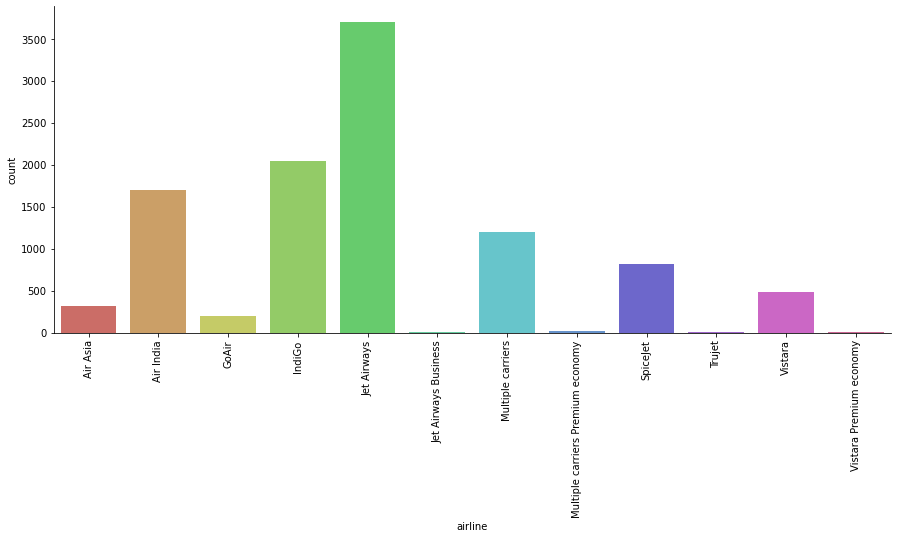

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(df, x ='airline' , palette ='hls')
plt.xticks(rotation = 90)
sns.despine()
plt.show()

### Conclusion:
Jet Airways takes the highest number of flights

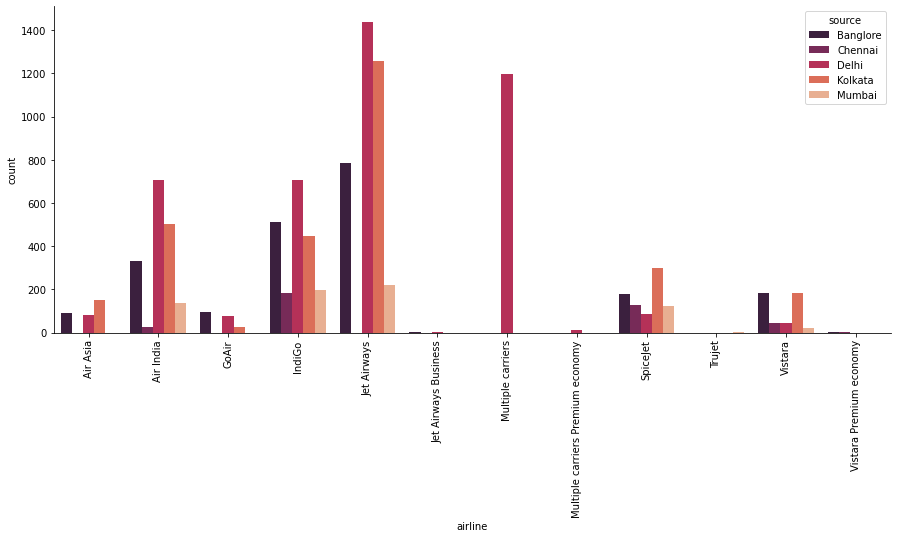

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(df, x ='airline' ,hue = 'source', palette ='rocket')
plt.xticks(rotation = 90)
sns.despine()
plt.show()

### Conclusion:
Most number of flights are from Delhi followed by Kolkata

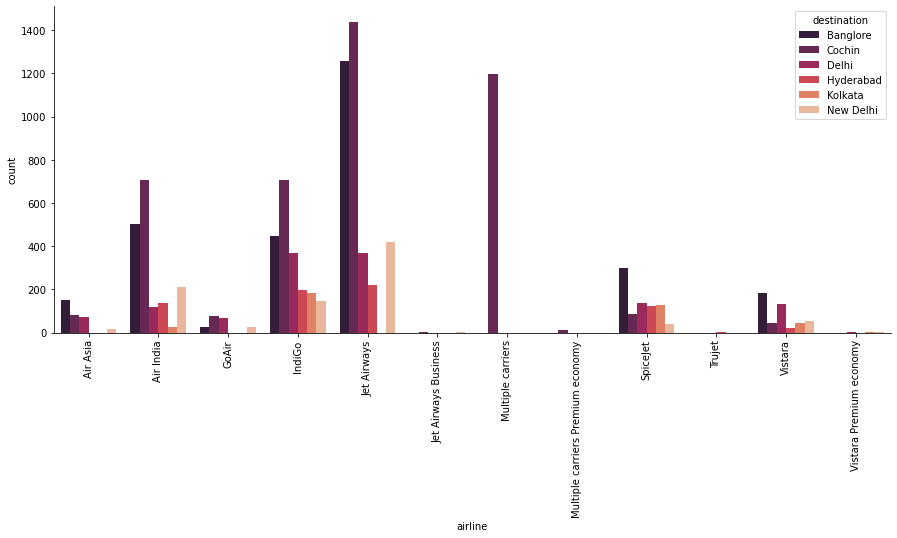

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(df, x ='airline' ,hue = 'destination', palette ='rocket')
plt.xticks(rotation = 90)
sns.despine()
plt.show()

### Conclusion:
Bangalore and Cochin have most frequent flights

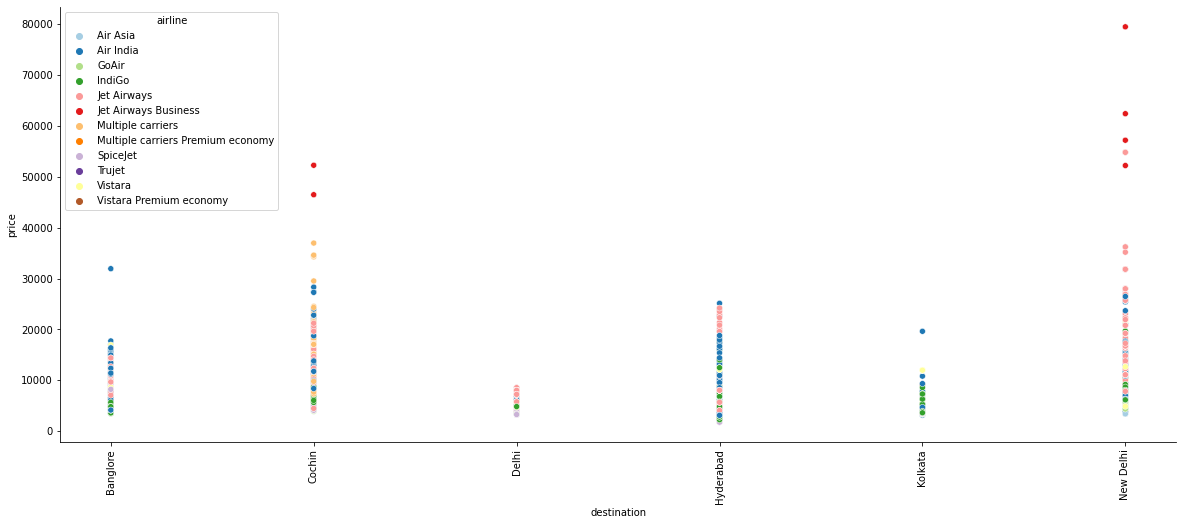

In [33]:
plt.figure(figsize=(20,8))
sns.scatterplot(df, x ='destination',y = 'price', hue = 'airline', palette = 'Paired')
plt.xticks(rotation = 90)
sns.despine()
plt.show()

### Conclusion:
The costliest flights are to New Delhi and Cochin from Jet Airways Business

<AxesSubplot:xlabel='month', ylabel='price'>

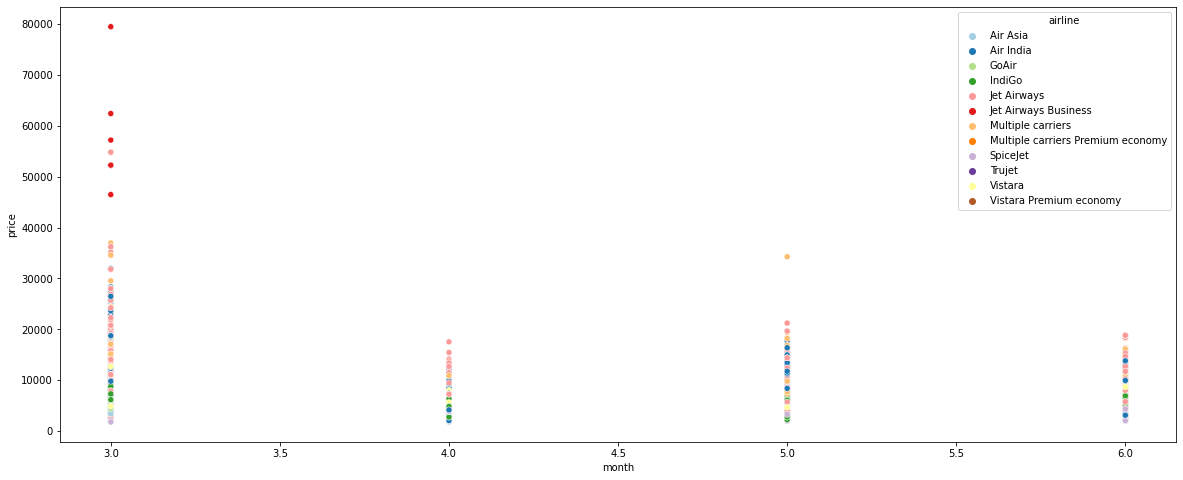

In [34]:
plt.figure(figsize = (20,8))
sns.scatterplot(df, x = 'month', y = 'price',hue = 'airline' ,palette='Paired')

### Conclusion:
Flight rates are highest in the first quarter and lowest in the second quarter

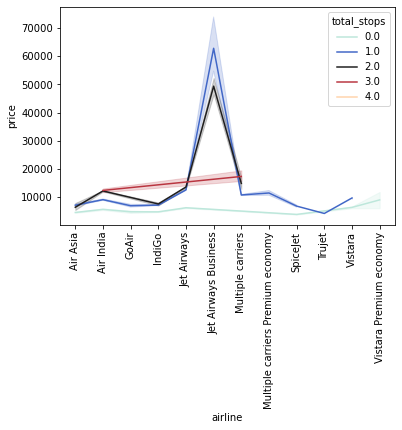

In [35]:
sns.lineplot(df, x =  'airline', y = 'price',hue = 'total_stops', palette='icefire' )
plt.xticks(rotation = 90)
plt.show()

### Conclusion:
1-Stop Fights with Jet Airways Business are the costliest followed by the 2-Stop flights with the same<br>
Non stop flights are the cheapest across the board

In [36]:
df

,airline,source,destination,duration,total_stops,price,date,month,year,arrival_hour,arrival_min,dep_hr,dep_min
0,IndiGo,Banglore,New Delhi,170.0,0.0,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445.0,2.0,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140.0,2.0,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325.0,1.0,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285.0,1.0,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,Kolkata,Banglore,150.0,0.0,4107,9,4,2019,22,25,19,55
10459,Air India,Kolkata,Banglore,155.0,0.0,4145,27,4,2019,23,20,20,45
10460,Jet Airways,Banglore,Delhi,180.0,0.0,7229,27,4,2019,11,20,8,20
10461,Vistara,Banglore,New Delhi,160.0,0.0,12648,1,3,2019,14,10,11,30


# Applying RobustScaler for correct data outliers

In [37]:
from sklearn.preprocessing import RobustScaler
import numpy as np

# Assuming 'data' is the array-like object containing your data

# Create the RobustScaler object
scaler = RobustScaler()

# Fit the scaler to your data
scaler.fit(df[['price']])

RobustScaler()

# Transform the data using the scaler

In [38]:


df['price'] = scaler.transform(df[['price']])

# Alternatively, you can fit and transform in one step
df['price'] = scaler.fit_transform(df[['price']])

# Print the scaled data
print(df['price'])


0       -0.614184
1       -0.084909
2        0.789485
3       -0.287903
4        0.707950
           ...   
10458   -0.584663
10459   -0.579321
10460   -0.145779
10461    0.616012
10462    0.490195
Name: price, Length: 10462, dtype: float64


# Creating the independent variable(X) and dependent variable(y)

In [39]:
x = df[['duration','total_stops','date','year','arrival_hour']]
y = df['price']

# Splitting the data set into train and test using train_test_split from sklearn.model_selection

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)


# Model

In [41]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
lm.fit(X_train,y_train)
LinearRegression()

LinearRegression()

In [42]:
y_pred = lm.predict(X_test)
lm.score(x,y)

0.39204363488443994

# Evaluate the model on the test set

In [43]:
from sklearn import metrics

In [44]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   0.35875683609234843
MSE :   0.2687999589220346
RMAE :   0.5184592162572044
